In [83]:
# HHL figure defaults 
# updated December 2024
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.25

# set default plot line width
matplotlib.rcParams['lines.linewidth'] = 0.5

# xtick and y axis sizes
matplotlib.rcParams['xtick.major.size'] = 2  # Major tick length for x-axis
matplotlib.rcParams['xtick.minor.size'] = 0.5   # Minor tick length for x-axis
matplotlib.rcParams['ytick.major.size'] = 2  # Major tick length for y-axis
matplotlib.rcParams['ytick.minor.size'] = 0.5   # Minor tick length for y-axis

# xtick and y axis sizes
matplotlib.rcParams['xtick.major.width'] = 0.375  # Major tick width for x-axis
matplotlib.rcParams['ytick.major.width'] = 0.375  # Major tick width for y-axis
matplotlib.rcParams['xtick.minor.width'] = 0.375  # Major tick width for x-axis
matplotlib.rcParams['ytick.minor.width'] = 0.375  # Major tick width for y-axis

# reduce padding
matplotlib.rcParams['xtick.major.pad'] = 1
matplotlib.rcParams['ytick.major.pad'] = 1


# **Set font sizes for ticks, labels, and legend**
matplotlib.rcParams['xtick.labelsize'] = 8  # Font size for x-tick labels
matplotlib.rcParams['ytick.labelsize'] = 8  # Font size for y-tick labels
matplotlib.rcParams['axes.labelsize'] = 10  # Font size for x-axis and y-	axis labels
matplotlib.rcParams['legend.fontsize'] = 8  # Font size for legend text

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

# make single figures with
# figure(None, (3,2), dpi=350)


In [84]:
def build_hist(indata, bin_width=1, max_x=60):
    
    bins = np.arange(0, max_x, bin_width)
    
    [counts, b] = np.histogram(indata, bins)
    plot_bins = (b+bin_width*0.5)[:-1]
    
    return (counts/np.sum(counts), plot_bins)

In [85]:
from soursop.sstrajectory import SSTrajectory

In [86]:
all_ntd_ensembles = {}
ntd_boundaries = {}

# SCO2 is special...
all_ntd_ensembles['SCO2_SCO2'] = SSTrajectory('../ensembles/SCO2_SCO2/full.xtc', '../ensembles/SCO2_SCO2/full.pdb').proteinTrajectoryList[0]

ntd_boundaries['SCO2_SCO2'] = [0, 49]

In [87]:
names = ['229E_229E','HKU1_HKU1', 'MERS_MERS', 'MHV1_MHV1', 'OC43_OC43']

for n in names:
    all_ntd_ensembles[n] = SSTrajectory(f'../ensembles/{n}/lammps_fixed_traj.xtc', f'../ensembles/{n}/lammps_fixed_traj.pdb').proteinTrajectoryList[0]

names.append('SCO2_SCO2')    

In [88]:
ntd_boundaries['229E_229E'] = [0, 18]
ntd_boundaries['HKU1_HKU1'] = [0, 60]
ntd_boundaries['MERS_MERS'] = [0, 37]
ntd_boundaries['MHV1_MHV1'] = [0, 63]
ntd_boundaries['OC43_OC43'] = [0, 60]

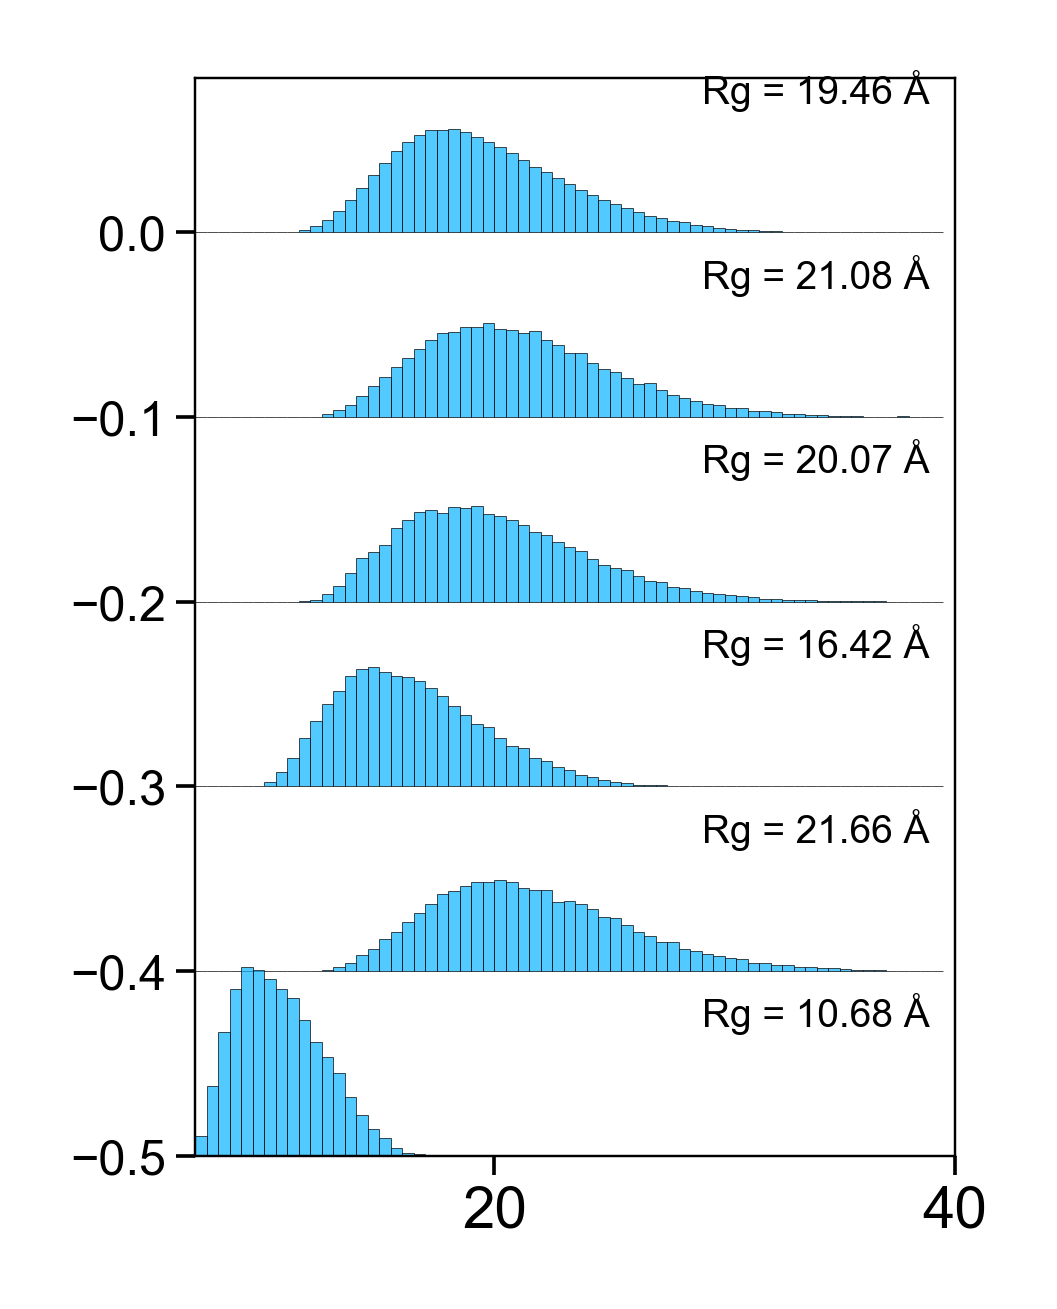

In [89]:
final_names = ['SCO2_SCO2', 'OC43_OC43', 'HKU1_HKU1', 'MERS_MERS', 'MHV1_MHV1', '229E_229E']


bottom = 0
bottom_step=0.1

figure(None, (1.4,2), dpi=350)
for n in final_names:
    start = ntd_boundaries[n][0]
    end = ntd_boundaries[n][1]
    rg_vals = all_ntd_ensembles[n].get_radius_of_gyration(R1=start, R2=end)
    [a,b] = build_hist(rg_vals, bin_width=0.5,max_x=40)

    bin_width = b[1]-b[0]
    plt.bar(b, a, bottom=bottom, width=bin_width, color='#09b4ff', alpha=0.7,edgecolor='k', linewidth=0.1)
    plt.text(29, 0.07+bottom, f'Rg = {round(np.mean(rg_vals),2)} Å', fontsize=4)
    
    #plt.plot(b, a+bottom,  color='k', alpha=0.7,linewidth=0.8)
    
    bottom = bottom - bottom_step

plt.xlim(7,40)
plt.xticks(fontsize=6)
plt.yticks(fontsize=5)
plt.savefig('ntd_ensembles.pdf')

        

49
60
60
37
63
18


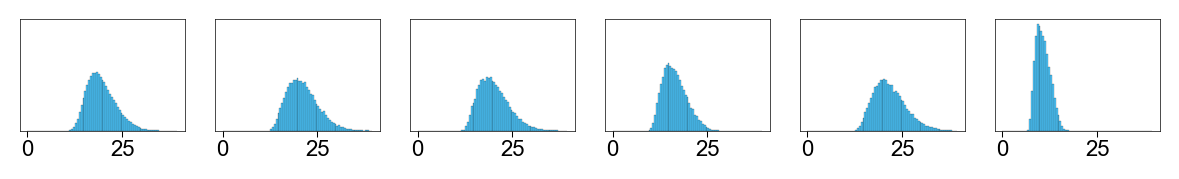

In [91]:
fig, axes = plt.subplots(1, 6, figsize=(6, 1), sharey=True)

for i, ax in enumerate(axes):

    n = final_names[i]

    start = ntd_boundaries[n][0]
    end = ntd_boundaries[n][1]
    print(end)
    rg_vals = all_ntd_ensembles[n].get_radius_of_gyration(R1=start, R2=end)
    [a,b] = build_hist(rg_vals, bin_width=0.5,max_x=40)

    bin_width = b[1]-b[0]
    ax.bar(b, a, width=bin_width, color='#09b4ff', alpha=0.7,edgecolor='k', linewidth=0.1)
    #ax.text(29, 0.07, f'Rg = {round(np.mean(rg_vals),2)} Å', fontsize=7)
    

    #
    ax.set_yticks([])  # optional: remove y-ticks


plt.subplots_adjust(wspace=0, hspace=0, left=0.01, right=0.99, top=0.9, bottom=0.1)
plt.tight_layout()
plt.savefig('ntd_ensembles_row.pdf')

In [11]:
bin_width=1.4
max_val=120
bins = np.arange(0,max_val, bin_width)

count=1000000


figure(None, (2.7,2), dpi=350)
bottom = 0
bottom_step=200
for l in lengths:
    [counts_sim, b] = np.histogram(rg[l],bins)
    plot_bins = (b+bin_width*0.5)[:-1]
    
    # afrc
    correction = len(rg[l])/count
    synthetic_rg = AnalyticalFRC('A'*l).sample_rg_distribution(count)
    
    #
    [counts_afrc, b] = np.histogram(synthetic_rg,bins)
    
    plt.bar(plot_bins, counts_sim, bottom=bottom, width=bin_width, color='red', alpha=0.3,edgecolor='k', linewidth=0.1)
    #plt.plot(plot_bins, counts_sim,  color='black', alpha=0.4)
    plt.plot(plot_bins, (counts_afrc*correction)+bottom,  color='k', alpha=0.7,linewidth=0.8)
    
    bottom = bottom - bottom_step
    
    

plt.xlim([0,90])
plt.yticks([])

plt.tight_layout()
plt.savefig('panel_1f.pdf')